# Idee
-- modello per indovinare la regione dalle descrizioni? difficile? 

-- in base agli aggettivi della descrizione e alla regione prevedere il vino? o solo la tipologia? il prezzo? boh

-- classificare i vini in base alle descrizioni in cluster? a cosa può servire?

-- quanto DOVREBBE costare una bottiglia rispetto alle recensioni ricevute?  "percieved value"

# *Possibile proposta*

1) prevedere se a un determinato sommelier piacerà un determinato vino in base alle descrizioni dei vari vini? VIsto che nella taster "experience" analysis sembra palese che ci siano delle preferenze, magari a un'azienda vinicola che deve far assaggiare suoi prodotti a lui potrebbe interessare sapere le caratteristiche comuni di quelle che ha votato bene...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("winemag-data-130k-v2.csv")
data.drop(columns=["Unnamed: 0"],inplace=True)
len(data)

129971

In [2]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [3]:
len(data[data.duplicated('description',keep=False)].sort_values('description'))

20026

In [4]:
len(data[data.duplicated(['description',"price","points","country","province","title"],keep=False)].sort_values('description'))

19966

In [5]:
data = data.drop_duplicates(["description","price","points","taster_name","title"])
len(data)

119988

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
country                  119929 non-null object
description              119988 non-null object
designation              85443 non-null object
points                   119988 non-null int64
price                    111593 non-null float64
province                 119929 non-null object
region_1                 100428 non-null object
region_2                 46769 non-null object
taster_name              95071 non-null object
taster_twitter_handle    90542 non-null object
title                    119988 non-null object
variety                  119987 non-null object
winery                   119988 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


.. tanti null sulla parte della designation, sulel due regioni e sui nomi dei reviewers

In [7]:
len(data["title"].unique())

118840

In [8]:
data["title"].unique()

array(['Nicosia 2013 Vulkà Bianco  (Etna)',
       'Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Rainstorm 2013 Pinot Gris (Willamette Valley)', ...,
       'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)',
       'Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)'],
      dtype=object)

# Missing values and correlations

In [9]:
"""
missingOnlyName = 0
missingOnlyTwitter = 0
missingBoth = 0
lis = []
for idx,row in data.iterrows():
    #print(row["taster_name"])
    if(pd.isnull(row["taster_name"]) and (not pd.isnull(row["taster_twitter_handle"]))):
        missingOnlyName = missingOnlyName + 1
    if(pd.isnull(row["taster_twitter_handle"]) and (not pd.isnull(row["taster_name"]))):
        missingOnlyTwitter = missingOnlyTwitter + 1
    if(pd.isnull(row["taster_name"]) and pd.isnull(row["taster_twitter_handle"])):
        missingBoth = missingBoth + 1
    couple = [row["taster_name"],row["taster_twitter_handle"]]
    if not couple in lis:
        lis.append(couple)
print(missingOnlyName,missingOnlyTwitter,missingBoth)
print(lis,len(lis))
"""
data.drop(["taster_twitter_handle"],axis=1,inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Dato che le twitter handle mancanti sono più dei nomi mancanti e non ci sono coppie (nome,twitter) del tipo ("nan","@sticaz") dalle quali si poteva risalire al nome originale così da avere meno valori sconosciuti, si può droppare tranquillamente il twitter handle senza perdere nulla

In [10]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [11]:
len(data["country"].unique())

44

In [12]:
avgPriceWinery = data.groupby("winery")#.price.mean()
#avgPriceWinery.get_group("1+1=3").price.mean()

In [13]:
data['price'] = data.apply(
    lambda row: avgPriceWinery.get_group(row["winery"]).price.mean() if pd.isnull(row['price']) else row['price'],
    axis=1
)
data["price"].fillna(data["price"].mean(),inplace=True)

#prende solo recensioni con autore conosciuto, ha senso come cosa?
#data.dropna(subset=["taster_name"],inplace=True)

data.fillna("unknown",inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=down

sarebbe meglio riempire i nan del prezzo basandosi sulla media dei vini venduti dalla stessa cantina?

In [14]:
from sklearn.preprocessing import LabelEncoder

# encode labels with value between 0 and n_classes-1.
desig_encoder = LabelEncoder()
taster_encoder = LabelEncoder()
variety_encoder = LabelEncoder()
winery_encoder = LabelEncoder()
country_encoder = LabelEncoder()
province_encoder = LabelEncoder()

data['Desig_Code'] = desig_encoder.fit_transform(data['designation'])
data['Taster_Code'] = taster_encoder.fit_transform(data['taster_name'])
data['Variety_Code'] = variety_encoder.fit_transform(data['variety'])
data['Winery_Code'] = winery_encoder.fit_transform(data['winery'])
data['Country_Code'] = country_encoder.fit_transform(data['country'])
data['Province_Code'] = province_encoder.fit_transform(data['province'])

data.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,Desig_Code,Taster_Code,Variety_Code,Winery_Code,Country_Code,Province_Code
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,17.0,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,36805,9,690,11608,22,331
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2325,15,450,12956,31,108
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,37913,14,436,13018,40,268
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,unknown,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,27974,0,479,14390,40,218
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,36465,14,440,14621,40,268


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

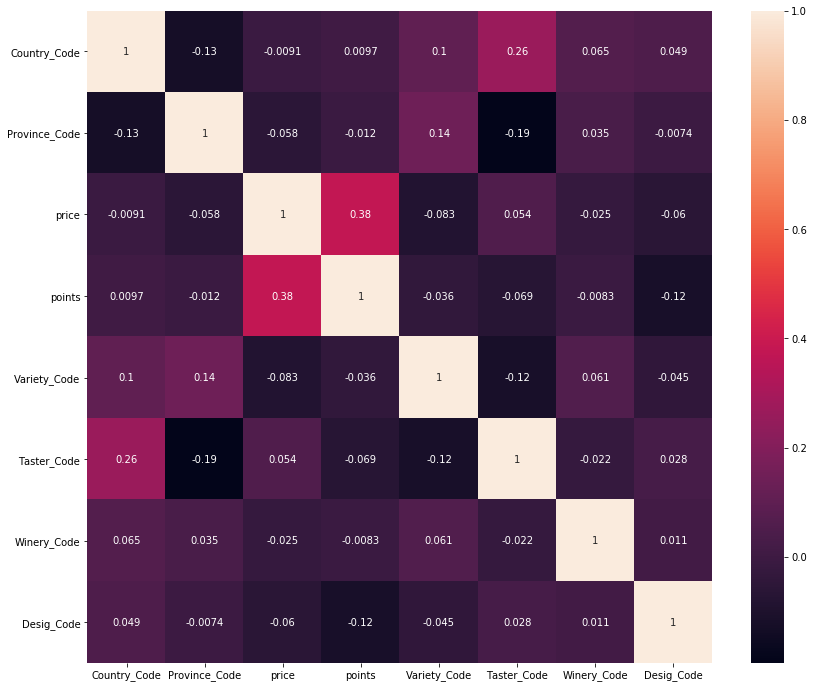

In [15]:
# calculate the correlation matrix
data1 = data[["Country_Code","Province_Code","price","points","Variety_Code","Taster_Code","Winery_Code","Desig_Code"]]
corr = data1.corr()
plt.subplots(figsize =(14, 12))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

Price e points sono loosely correlated, perchè la correlation fra country e province è così bassa? forse perchè ci sono tante province all'interno di una nazione

# General analysis

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


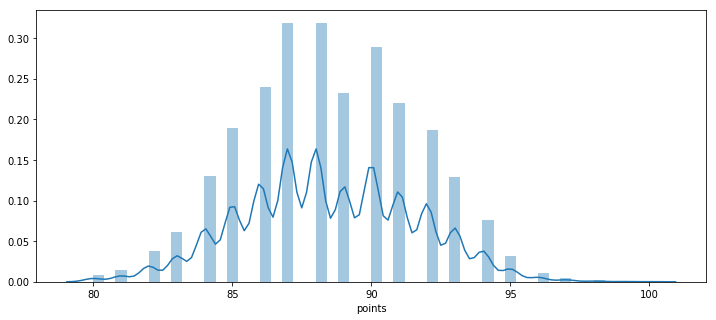

In [16]:
fig, ax = plt.subplots(figsize = (12, 5))
points = data["points"].astype(int)
sns.distplot(points)

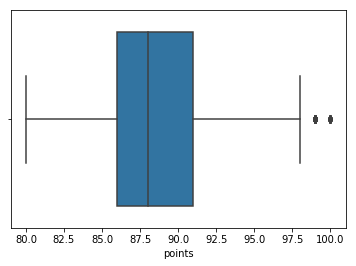

In [17]:
sns.boxplot(data["points"])

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


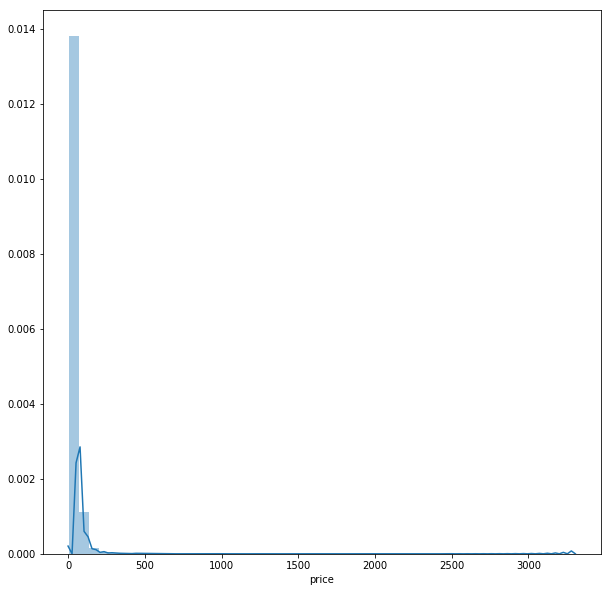

In [18]:
x = data.dropna(subset=["price"])
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.distplot(x["price"])

La grandissima maggioranza dei vini costa meno di 100 dollari

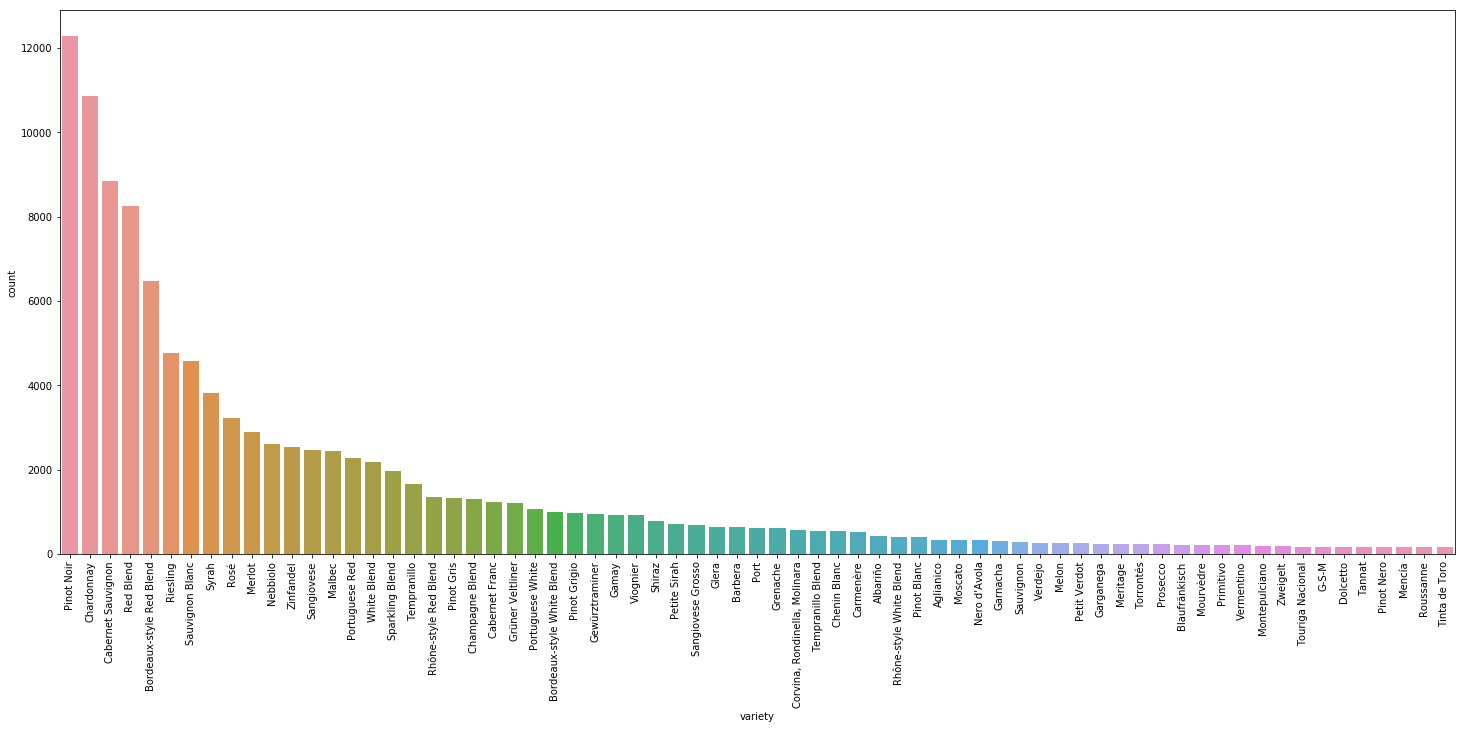

In [19]:
variety_df = data.groupby('variety').filter(lambda x: len(x) > 150)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

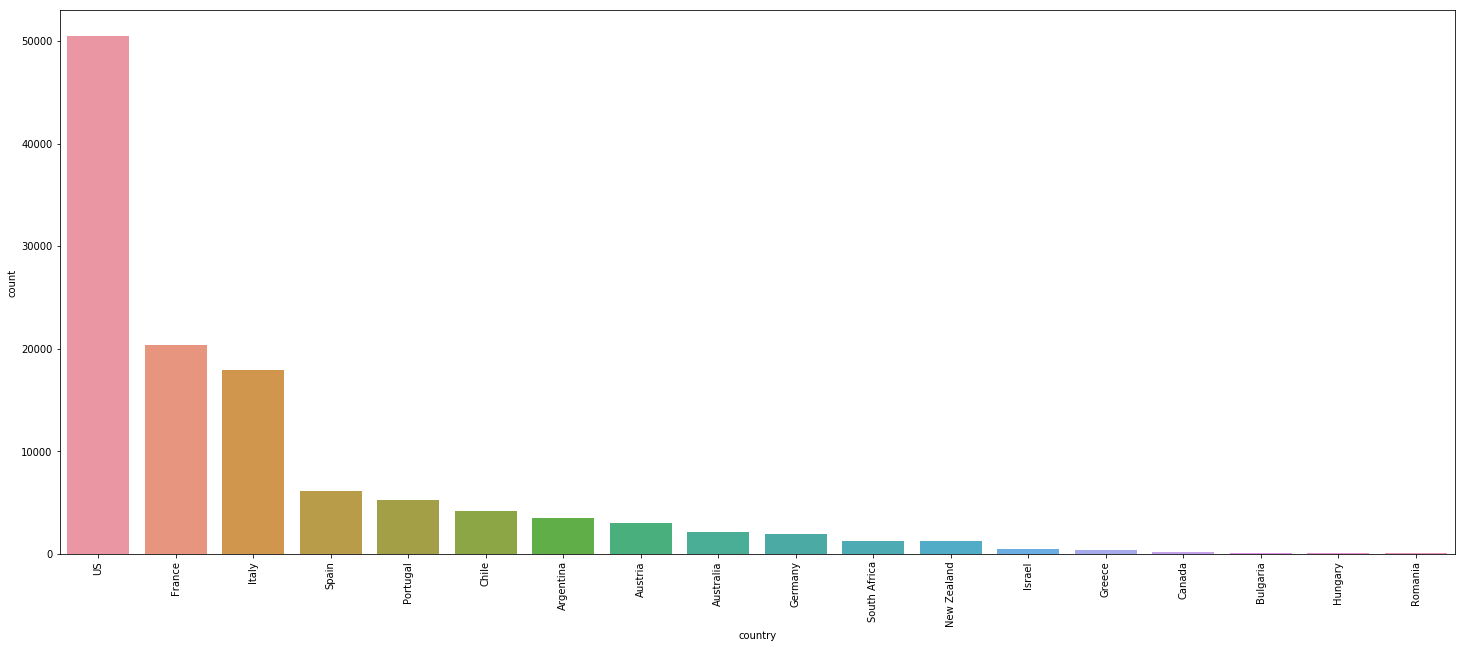

In [20]:
country = data.groupby("country").filter(lambda x: len(x)>100) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
countryInfo = country['country'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = country['country'], order = countryInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()
#country.groups
#country.get_group("Argentina")

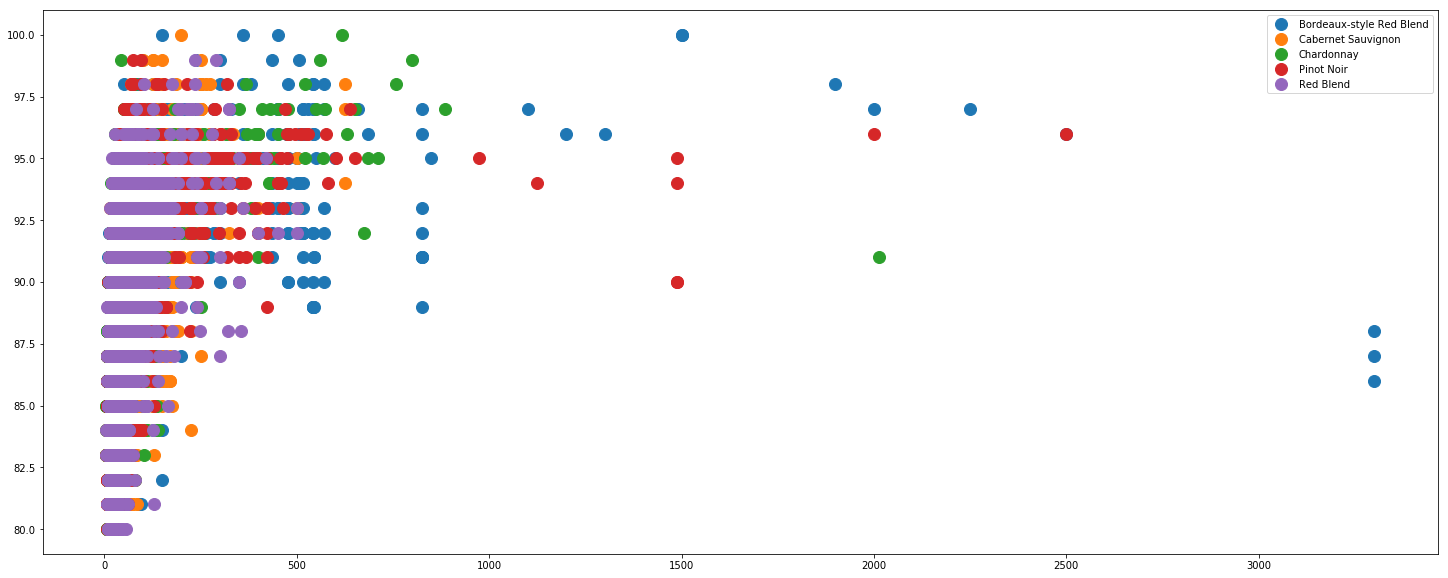

In [21]:
var = data.groupby("variety").filter(lambda x: len(x)>6000)
var = var.groupby("variety")
fig, ax = plt.subplots(figsize = (25, 10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in var:
    ax.plot(group["price"], group["points"], marker='o', linestyle='', ms=12, label=name)
plt.legend()
plt.show()

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


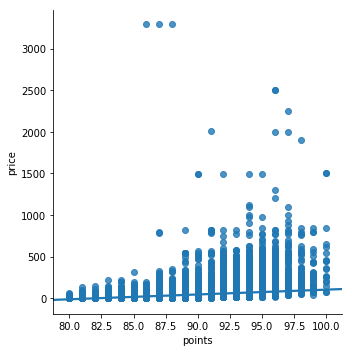

In [22]:
sns.lmplot(x="points", y ="price",data = data)

-- In generale si può notare correlazione positiva fra prezzo e qualità: più è alto il prezzo, più tende ad essere buono il vino

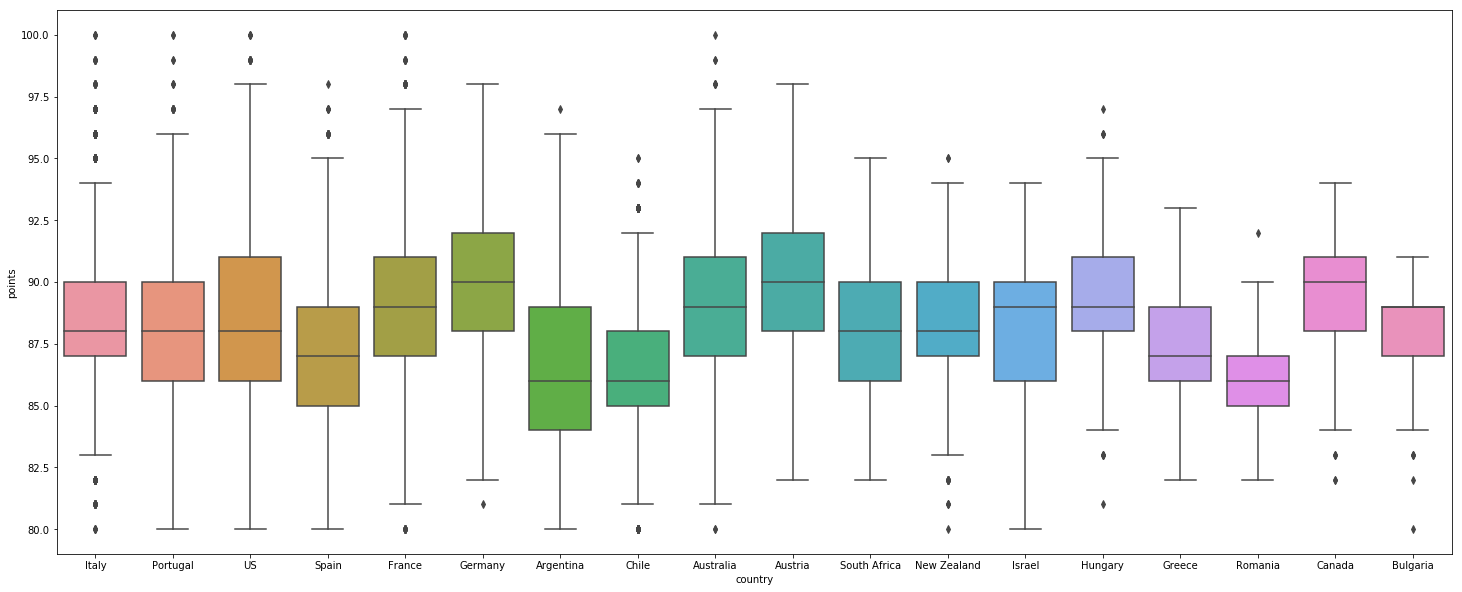

In [23]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.boxplot(x="country", y="points", data=country)

l'argentina, il chile, la romania e la spagna sembrano essere i paesi con le mediane più basse per quanto riguarda i punti. Mentre germania, austria e canada i più alti.

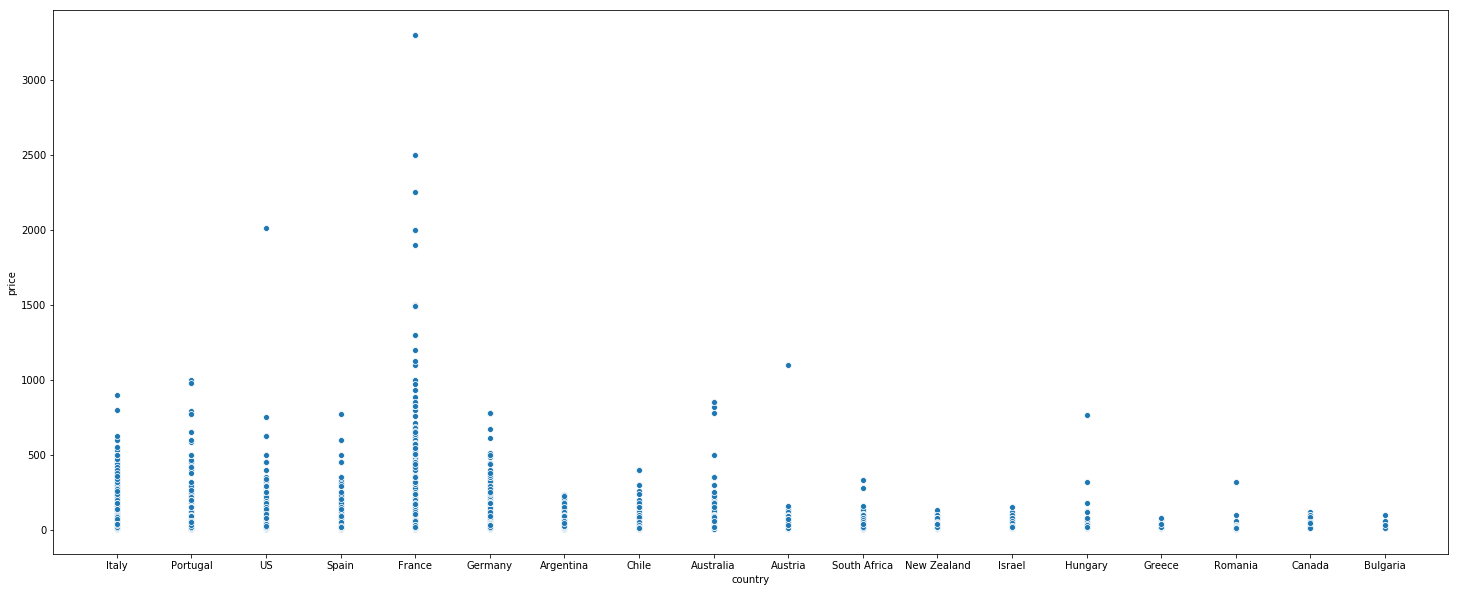

In [24]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x="country", y="price", data=country) #il boxplot viene male??

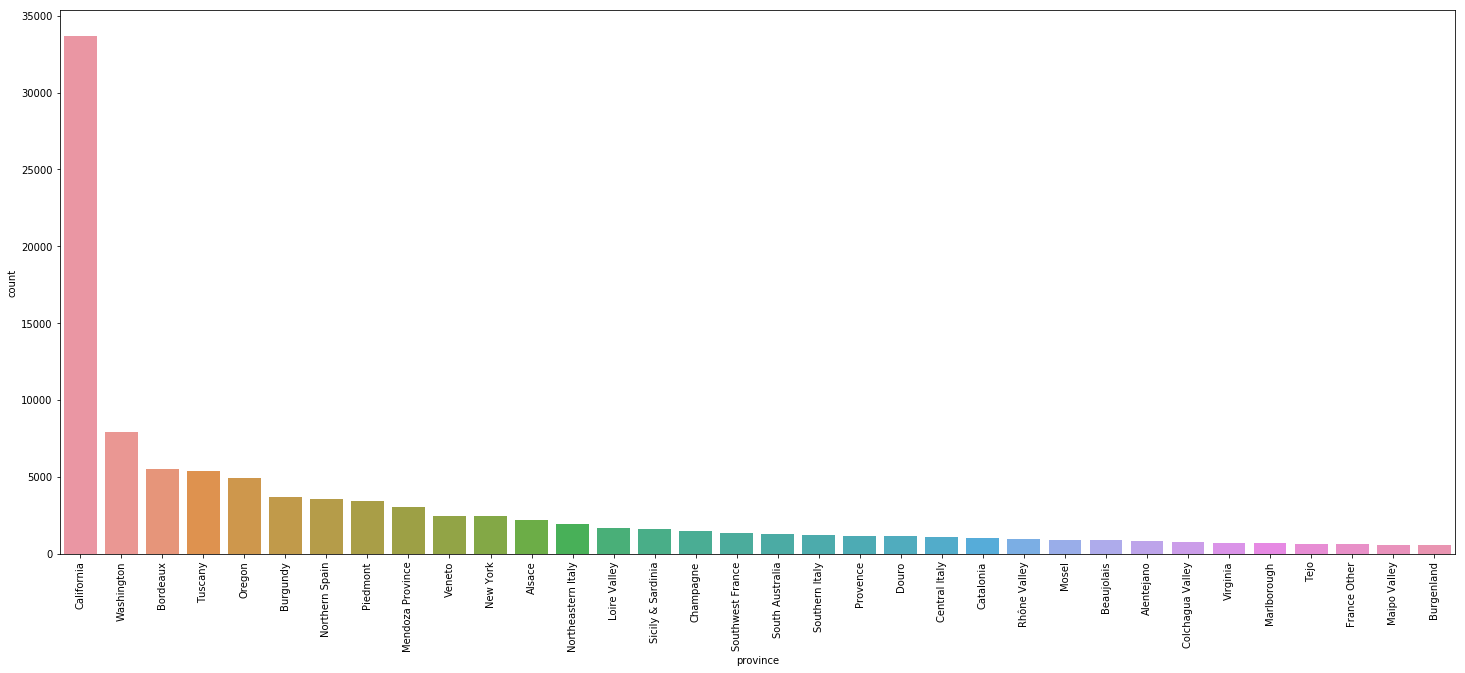

In [25]:
prov = data.groupby("province").filter(lambda x: len(x)>600) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
provInfo = prov['province'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = prov['province'], order = provInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()

il dataset è palesemente "spostato" verso gli stati uniti e in particolare la california

# Winery analysis 

In [26]:
wineries = data.groupby(["winery"])
d1 = pd.DataFrame({'mean_pts' : wineries["points"].mean(), "mean_price": wineries["price"].mean(),
                   "reviews_number": wineries["description"].nunique(), "variety_number":wineries["variety"].nunique(),
                  "varieties":wineries["variety"].unique().tolist()}
                 ).reset_index()
res = d1.sort_values(["reviews_number","mean_pts"],ascending=False)
res

,winery,mean_pts,mean_price,reviews_number,variety_number,varieties
16523,Wines & Winemakers,87.639810,17.668342,211,16,"[Rosé, Portuguese White, Portuguese Red, Antão..."
16476,Williams Selyem,92.774510,59.691176,204,8,"[Pinot Noir, Chardonnay, Zinfandel, Port, Musc..."
15038,Testarossa,90.726368,51.795000,201,6,"[Pinot Noir, Syrah, Chardonnay, Meritage, Red ..."
5422,DFJ Vinhos,86.535000,10.969072,200,18,"[Rosé, Portuguese White, Touriga Nacional, Red..."
10238,Louis Latour,90.541667,137.355422,192,3,"[Chardonnay, Pinot Noir, Gamay]"
7867,Georges Duboeuf,87.424731,19.357143,186,4,"[Gamay, Chardonnay, Viognier, Rosé]"
2862,Chateau Ste. Michelle,88.736842,22.482353,171,16,"[Cabernet Sauvignon, Sauvignon Blanc, Chardonn..."
5052,Concha y Toro,87.610390,30.585526,154,11,"[Sauvignon Blanc, Carmenère, Cabernet Sauvigno..."
5025,Columbia Crest,87.739726,18.931034,146,26,"[Merlot, Red Blend, Chardonnay, Johannisberg R..."
9253,Kendall-Jackson,88.638655,26.436975,119,15,"[White Blend, Zinfandel, Cabernet Sauvignon, B..."


In [27]:
res.iloc[0]["varieties"][0]

'Rosé'

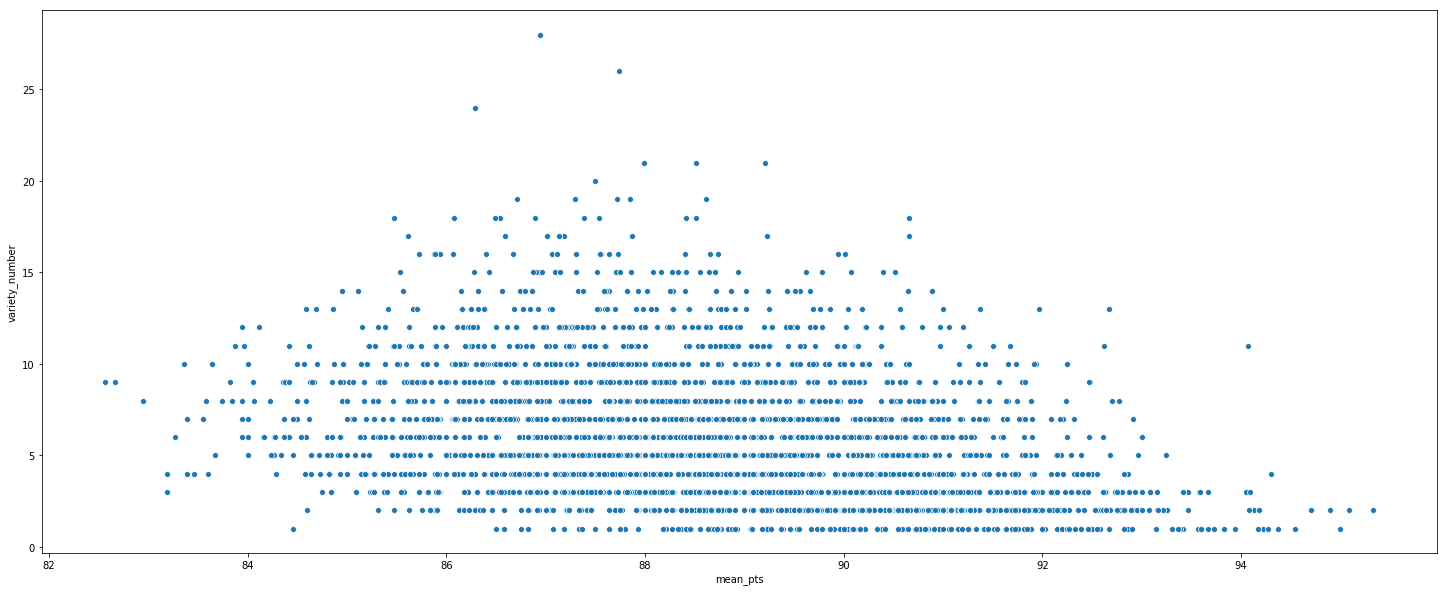

In [28]:
#prende quelle con un numero di entry maggiore di 10
res = res[res["reviews_number"] > 10]
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x="mean_pts", y="variety_number", data=res)

Si può notare come la parte in mezzo "meh points" facciano un alto numero di vini, mentre quelli con i punteggi più alti si concentrano su meno di 5 varietà. Si può dire che chi si concentra solo su una cosa va meglio? 

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


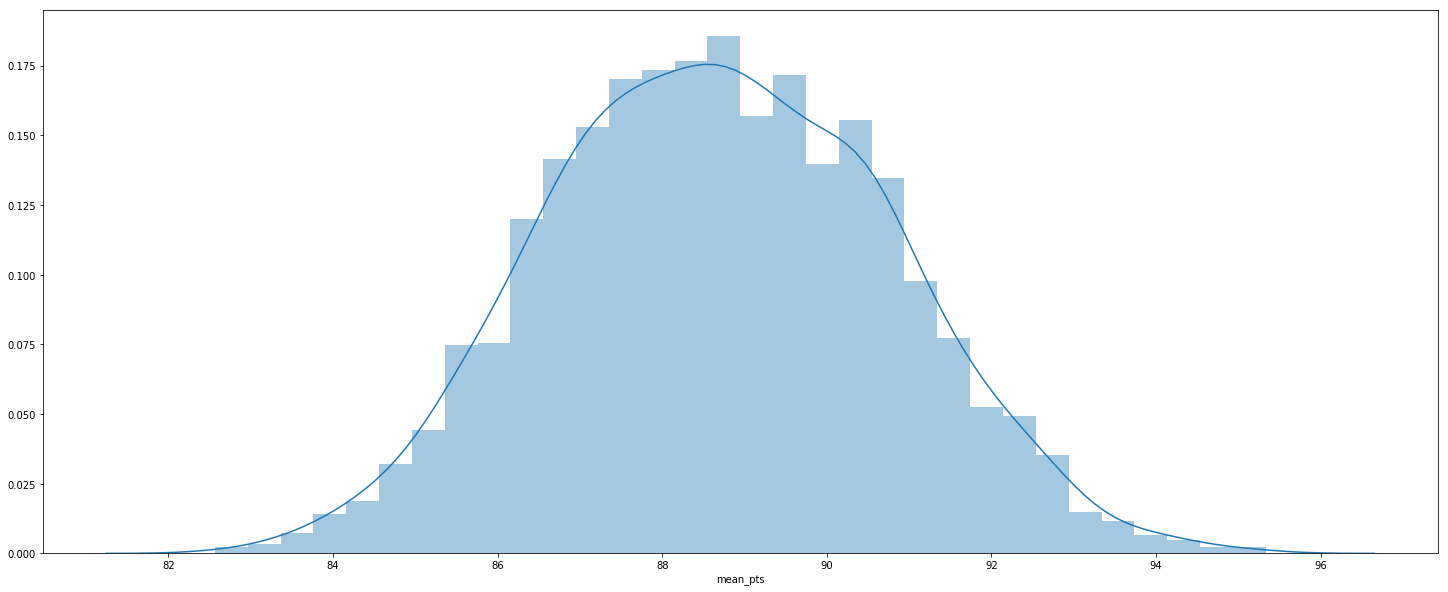

In [29]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.distplot(res["mean_pts"])

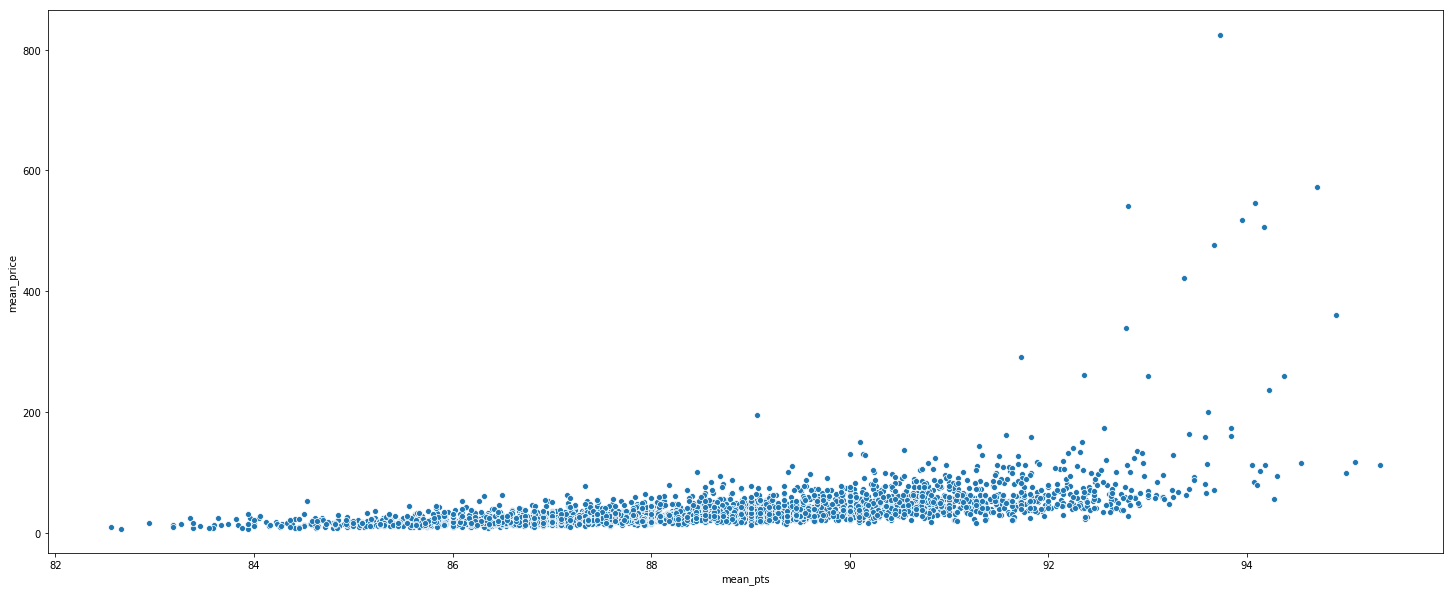

In [30]:
fig, ax = plt.subplots(figsize = (25, 10))
ax = sns.scatterplot(x="mean_pts", y="mean_price", data=res)

Palese la presenza ancora di un trend, anche per quanto riguarda le cantine. Più una cantina ha una media di punteggi migliori, più tende a far pagare le bottiglie, notare come le cantine votate meglio hanno un prezzo più basso rispetto alle altre controparti dai punteggi alti.

# **Taster "experience" analysis** , me gusta, interessante
Curioso per quanto riguarda i tasters, rimaneggio un po' i dati per averli in un altro dataframe più comodo per vedere come si comportano dal punto di vista della varietà di vini assaggiati

['Kerin O’Keefe' 'Roger Voss' 'Paul Gregutt' 'Alexander Peartree'
 'Michael Schachner' 'Anna Lee C. Iijima' 'Virginie Boone' 'Matt Kettmann'
 'unknown' 'Sean P. Sullivan' 'Jim Gordon' 'Joe Czerwinski'
 'Anne Krebiehl\xa0MW' 'Lauren Buzzeo' 'Mike DeSimone' 'Jeff Jenssen'
 'Susan Kostrzewa' 'Carrie Dykes' 'Fiona Adams' 'Christina Pickard']


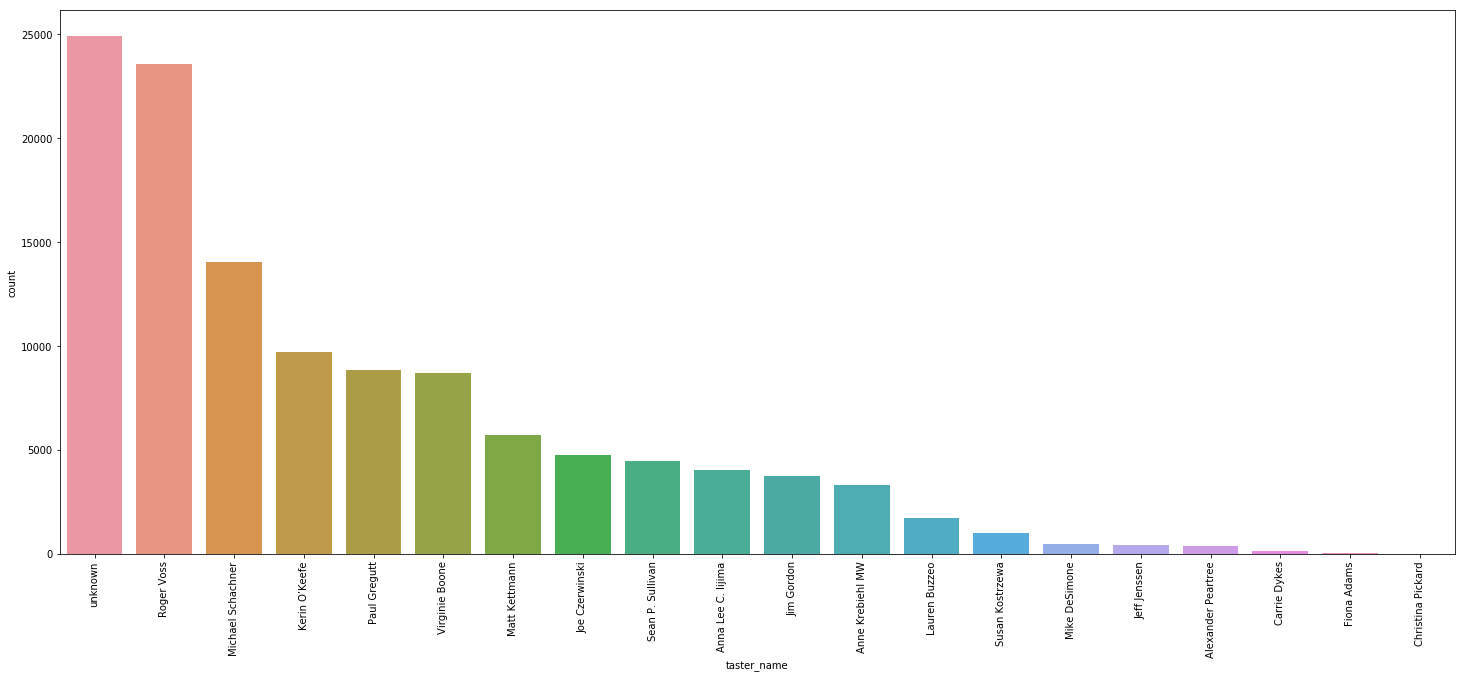

In [31]:
testers = data.groupby("taster_name").filter(lambda x: len(x)>0) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
print(testers["taster_name"].unique())
testerInfo = testers['taster_name'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = testers['taster_name'], order = testerInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [32]:
#togli i taster sconosciuti? 
reviewers = data["taster_name"].unique().tolist()
len(reviewers)
countries = data["country"].unique().tolist()

In [33]:
countriesTasted = []
for r in reviewers:
    d1 = data[data["taster_name"] == r]
    temp = dict(d1["country"].value_counts())
    wines = d1["variety"].unique().tolist()
    wineries = d1["winery"].unique().tolist()
    countriesTasted.append([r,temp,wines,wineries])
#countriesTasted
stacked = pd.DataFrame(columns = ["taster","#countries","#varieties","#wineries"]+countries)
for i in range(0,len(countriesTasted)):
    stacked.loc[i,"taster"] = (countriesTasted[i][0])
    stacked.loc[i,"#countries"] = len(countriesTasted[i][1])
    stacked.loc[i,"#varieties"] = len(countriesTasted[i][2])
    stacked.loc[i,"#wineries"] = len(countriesTasted[i][3])
    for c in countriesTasted[i][1]:
        stacked.loc[i,c] = countriesTasted[i][1][c]
stacked = stacked.fillna(0)
stacked
#stacked.describe()

,taster,#countries,#varieties,#wineries,Italy,Portugal,US,Spain,France,Germany,...,Bulgaria,Cyprus,Armenia,Switzerland,Bosnia and Herzegovina,Ukraine,Slovakia,Macedonia,China,Egypt
0,Kerin O’Keefe,1,140,2111,9697,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Roger Voss,8,216,4016,96,5223,2,0,17150,0,...,0,0,0,0,0,0,0,0,0,0
2,Paul Gregutt,6,129,1037,4,0,8666,4,34,0,...,0,0,0,0,0,0,0,0,0,0
3,Alexander Peartree,1,62,108,0,0,383,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Michael Schachner,12,202,2415,76,9,71,6046,20,0,...,0,0,0,0,0,0,0,0,0,0
5,Anna Lee C. Iijima,18,114,480,0,0,2205,0,0,1606,...,18,0,0,0,1,2,1,1,0,0
6,Virginie Boone,1,121,1562,0,0,8708,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Matt Kettmann,2,113,844,0,0,5729,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,unknown,16,277,5213,7979,5,15991,64,258,31,...,0,0,0,0,0,0,0,0,0,0
9,Sean P. Sullivan,2,98,539,0,0,4432,0,0,0,...,0,0,0,0,0,0,0,0,0,0


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


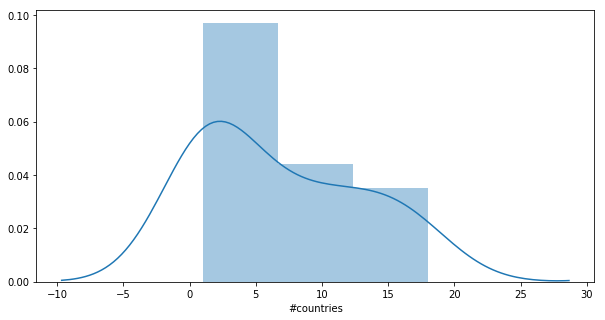

In [34]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(stacked["#countries"])
plt.show()

su 44 paesi presenti, tutti hanno assaggiato vini provenienti da meno della metà.

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


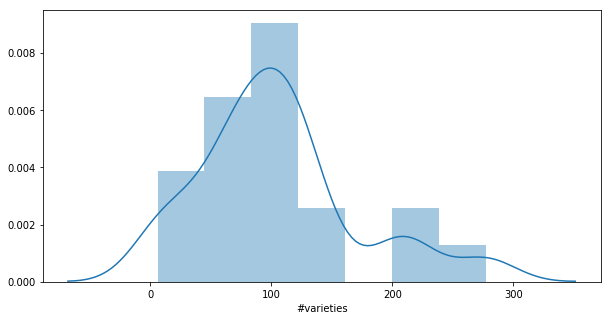

In [35]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(stacked["#varieties"])
plt.show()

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


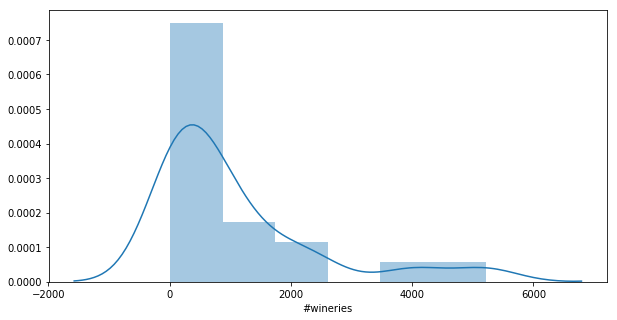

In [36]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(stacked["#wineries"])
plt.show()

tanti taster hanno assaggiato vini provenienti da meno di 5 paesi,in media almeno 100 varietà diverse di vino, da generalmente 500 cantine diverse

In [37]:
t1 = data.groupby(["taster_name","variety"])
t2 = pd.DataFrame({'mean_pts' : t1["points"].mean(), "times_reviewed": t1["description"].count(),
                   "norm_points": 1/(t1["points"].mean()/ t1["description"].count())} #maybe need for some kind of normalization
                 ).reset_index()
#res = d1.sort_values(["reviews_number","mean_pts"],ascending=False)
t2 = t2[t2["times_reviewed"] > 30]
final = t2.sort_values(["times_reviewed","mean_pts"],ascending=False)
final

,taster_name,variety,mean_pts,times_reviewed,norm_points
1323,Roger Voss,Bordeaux-style Red Blend,88.872061,4424,49.779424
1847,unknown,Cabernet Sauvignon,88.801831,3058,34.436227
1993,unknown,Pinot Noir,88.652359,2819,31.798364
1870,unknown,Chardonnay,87.499251,2670,30.514547
1342,Roger Voss,Chardonnay,89.338001,2571,28.778347
1251,Paul Gregutt,Pinot Noir,89.557160,2493,27.836970
1433,Roger Voss,Portuguese Red,88.843723,2278,25.640528
666,Kerin O’Keefe,Red Blend,88.703524,2270,25.590866
134,Anna Lee C. Iijima,Riesling,89.415471,1952,21.830674
640,Kerin O’Keefe,Nebbiolo,90.243335,1763,19.536069


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


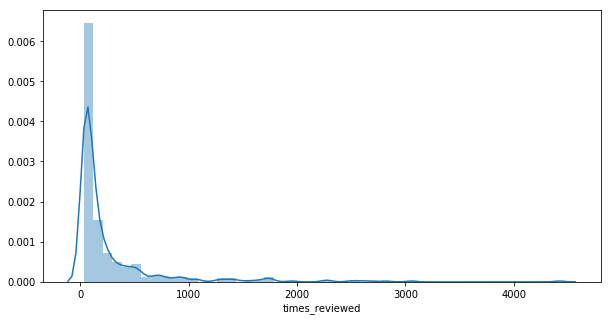

In [38]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.distplot(final["times_reviewed"])
plt.show()

In [39]:
#non contiamo gli unkwnown
f1 = final[final["taster_name"] == "Roger Voss"]
f1

,taster_name,variety,mean_pts,times_reviewed,norm_points
1323,Roger Voss,Bordeaux-style Red Blend,88.872061,4424,49.779424
1342,Roger Voss,Chardonnay,89.338001,2571,28.778347
1433,Roger Voss,Portuguese Red,88.843723,2278,25.640528
1430,Roger Voss,Pinot Noir,89.909931,1732,19.263723
1452,Roger Voss,Rosé,86.840347,1616,18.608862
1341,Roger Voss,Champagne Blend,90.096296,1080,11.987174
1436,Roger Voss,Portuguese White,86.911069,1057,12.161857
1324,Roger Voss,Bordeaux-style White Blend,88.779894,945,10.644302
1363,Roger Voss,Gamay,88.043478,920,10.449383
1460,Roger Voss,Sauvignon Blanc,88.350389,899,10.175394


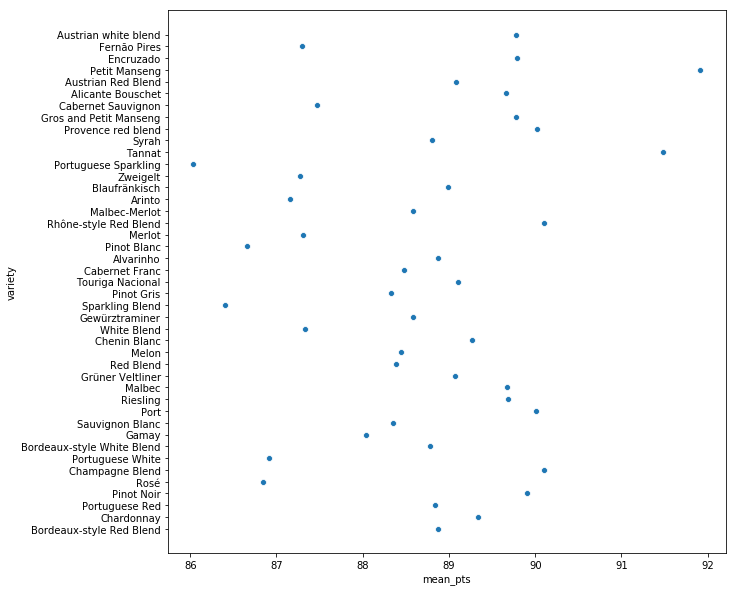

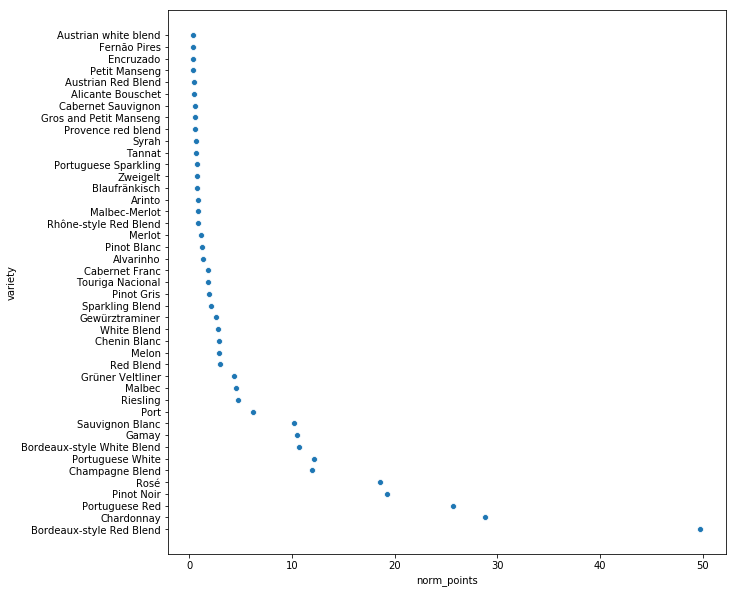

In [40]:
#based on row data, not normalized based on how many times he reviewed it
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="mean_pts",y="variety",data=f1)
plt.show()
#normalized attempt
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="norm_points",y="variety",data=f1)
plt.show()

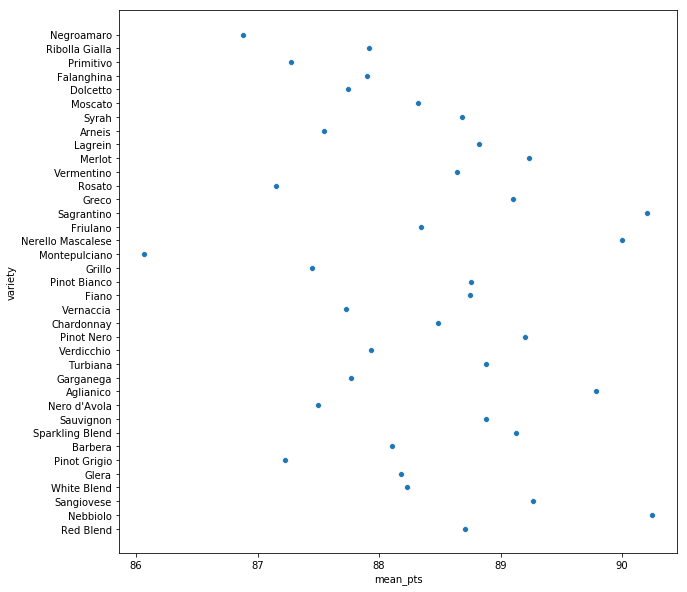

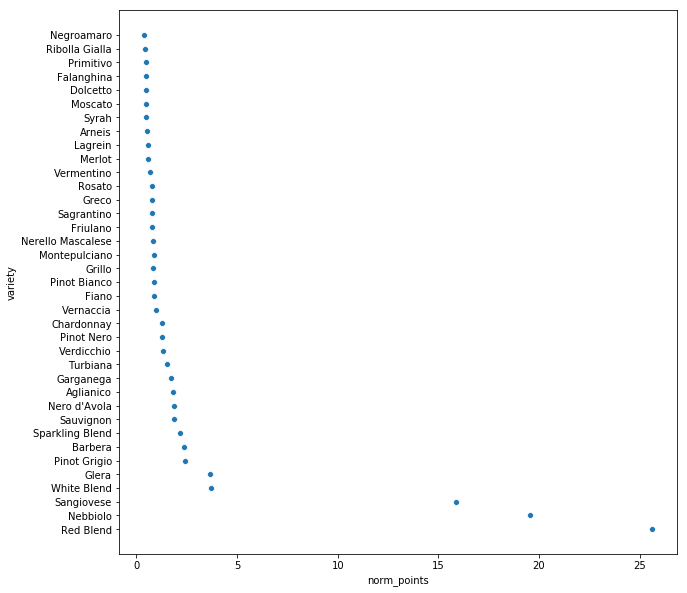

In [41]:
#not normalized another author
f2 = final[final["taster_name"] == "Kerin O’Keefe"]
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="mean_pts",y="variety",data=f2)
plt.show()
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.scatterplot(x ="norm_points",y="variety",data=f2)
plt.show()

In [42]:
#testers = data.groupby(["taster_name","country"])
#for name,group in testers:
#    print(name)
#    print(len(group))

Potrebbero esserci "bias" o comunque preferenze dei vini da parte di persone che hanno assaggiato vini provenienti da meno paesi? cioè se uno ha provato vini statunitensi e basta magari ha assegnato un voto più alto di quello che uno che ha assaggiato 203020 vini da paesi diversi perchè magari non ha idea di cosa voglia dire

magari da provare a comparare i punteggi sugli stessi vini fra personaggi diversi

controlla anche le cose della designation "designationThe vineyard within the winery where the grapes that made the wine are from"

In [43]:
"""
desig = data.groupby(["designation"])
desig["designation"].count()
"""


'\ndesig = data.groupby(["designation"])\ndesig["designation"].count()\n'

In [44]:
revs = data.groupby(["title"]).filter(lambda x: len(x) >= 2)
len(revs)

2082

-- La grandissima maggioranza delle recensioni è "singola", solo una persona ha assaggiato e ha dato il voto? o dups?

In [45]:
#revs.groupby(["title"]).groups
#pd.DataFrame({'count' : revs.groupby([ "title"] ).size(),"mean":5}).reset_index()


In [46]:
singleTitleExample = revs[revs["title"] == "Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)"]
singleTitleExample

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,Desig_Code,Taster_Code,Variety_Code,Winery_Code,Country_Code,Province_Code
3209,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,18,553,8001,40,51
4399,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,18,553,8001,40,51
27773,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,19,553,8001,40,51
63179,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,18,553,8001,40,51
81563,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,19,553,8001,40,51
94321,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,19,553,8001,40,51
100738,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,19,553,8001,40,51
109001,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,18,553,8001,40,51
122208,US,This bubbly is rich in cherry and raspberry fr...,Sonoma Brut,86,20.0,California,Sonoma County,Sonoma,unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer,31447,19,553,8001,40,51


In [47]:
#singleTitleExample["taster_name"].unique()

In [48]:
#ex1 = revs[revs["title"] == "Roland Champion NV Brut Rosé  (Champagne)"]
#ex1

In [49]:
#ex1 = revs[revs["title"] == "Ferrari-Carano 2014 Siena Red (Sonoma County)"]
#ex1

In [50]:
#ex1 = revs[revs["title"] == "Liebart-Régnier NV Brut  (Champagne)"]
#ex1 

Stessi reviewer due descrizioni diverse, con voti diversi, sullo stesso titolo, ma con prezzi diversi? Wot? Sempre un problema che molti reviewer sono senza nome

# analisi veloce delle recensioni senza nome
non so se tenerle o meno

In [51]:
unknown = data[data["taster_name"] == "unknown"]
len(unknown)

24917

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

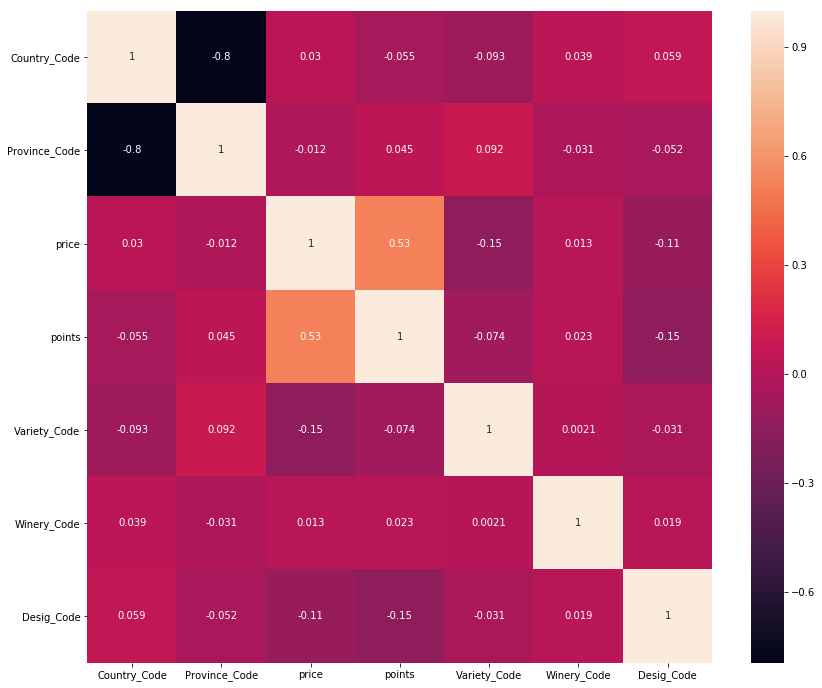

In [52]:
data2 = unknown[["Country_Code","Province_Code","price","points","Variety_Code","Winery_Code","Desig_Code"]]
corr = data2.corr()
plt.subplots(figsize =(14, 12))

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

le correlazioni sono più alte

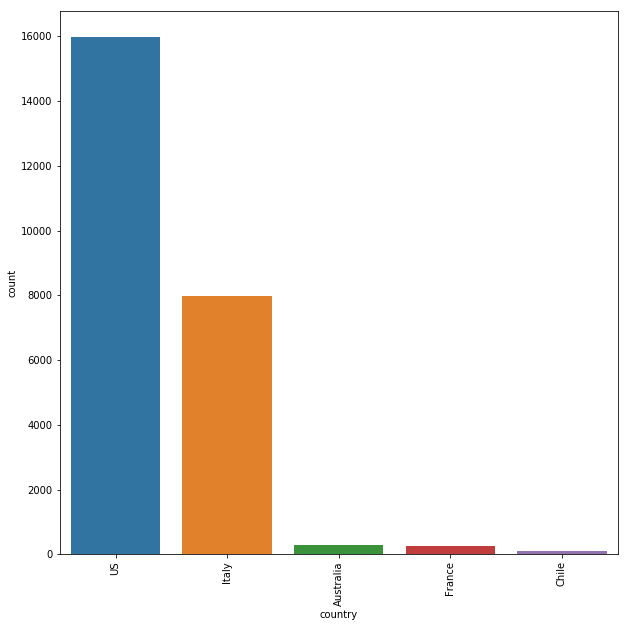

In [53]:
country = unknown.groupby("country").filter(lambda x: len(x)>100) #> tot perchè così prende i paesi un po' più interessanti visti i numeri
countryInfo = country['country'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = country['country'], order = countryInfo, ax = ax)
plt.xticks(rotation = 90)
plt.show()


recensioni fatte solo per quanto riguarda usa, italia, australia, francia e chile. 24 mila

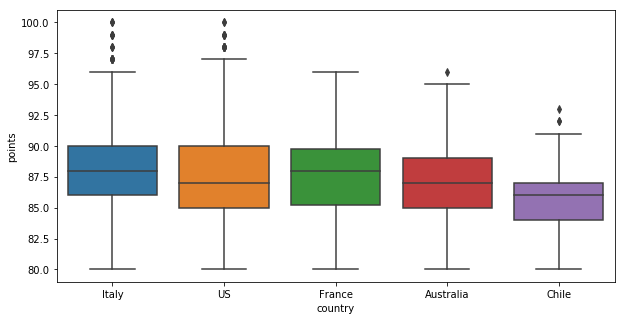

In [54]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.boxplot(x="country", y="points", data=country)